# Model Test

Import libraries

In [12]:
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

from scipy.misc import imread, imresize
import pandas as pd
import glob
import pickle
from conv_model import conv_model
from sklearn.utils import resample
from keras.metrics import sparse_categorical_accuracy

Load model and weights

In [13]:
model = conv_model()
model.load_weights("./output/weights.hdf5")

Load and display new traffic sign images from test set

In [14]:
SignNames = pd.read_csv('./input/signnames.csv')
testing_file = './input/test.p'
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
X_test, y_test = test['features'], test['labels']

Overall prediction accuracy on test set

In [15]:
y_pred = model.predict_classes(X_test)
acc = np.sum(y_pred==y_test)/np.size(y_pred)
print("Test accuracy = {}".format(acc))

12630/12630 [==============================] - 12s    
Test accuracy = 0.9958828186856691


Let's see how many images the model got wrong

In [27]:
X_wrong = X_test[y_pred!=y_test]
y_wrong = y_test[y_pred!=y_test]
print(X_wrong.shape[0])

52


Visualize all the images the model failed to predict

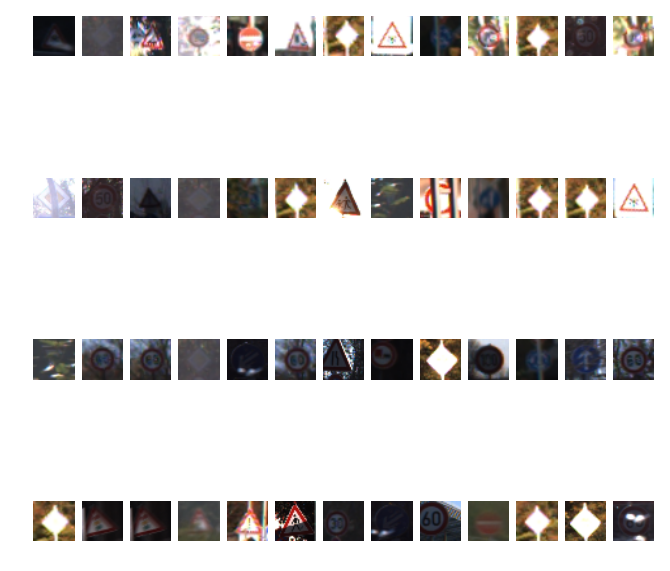

In [33]:
gs1 = gridspec.GridSpec(4, 13)
plt.figure(figsize=(8,8))
for i in range(52):
    ax1 = plt.subplot(gs1[i])
    plt.subplot(4,13,i+1)
    plt.imshow(X_wrong[i])
    plt.axis('off')

Subset accuracy

In [5]:
blue = [33,34,35,36,37,38,39,40]
danger = [11,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
end_of = [6,32,41,42]
red_round = [0,1,2,4,5,8,10,15,16]
red_other = [9,10,15,16]
speed = [0,1,2,3,4,5,7,8]
special = [12,13,14,17]

def sub_cat_acc(filter):
    X_sub = X_test[np.in1d(y_test, filter)]
    y_sub = y_test[np.in1d(y_test, filter)]
    y_pred = model.predict_classes(X_sub)
    acc = np.sum(y_pred==y_sub)/np.size(y_pred)
    print("Test accuracy = {}".format(acc))

print("blue:")
sub_cat_acc(blue)
print("danger:")
sub_cat_acc(danger)
print("end-of:")
sub_cat_acc(end_of)
print("red-round:")
sub_cat_acc(red_round)
print("red-other:")
sub_cat_acc(red_other)
print("speed:")
sub_cat_acc(speed)
print("special:")
sub_cat_acc(special)

blue:
1770/1770 [==============================] - 1s     
Test accuracy = 0.996045197740113
danger:
2790/2790 [==============================] - 2s     
Test accuracy = 0.9953405017921146
end-of:
360/360 [==============================] - 0s     
Test accuracy = 1.0
red-round:
4290/4290 [==============================] - 4s     
Test accuracy = 0.9981351981351981
red-other:
1500/1500 [==============================] - 1s     
Test accuracy = 0.9986666666666667
speed:
4128/4170 [============================>.] - ETA: 0sTest accuracy = 0.9968824940047961
special:
2040/2040 [==============================] - 2s     
Test accuracy = 0.9916666666666667


Random select a dozen of test images and visualize them

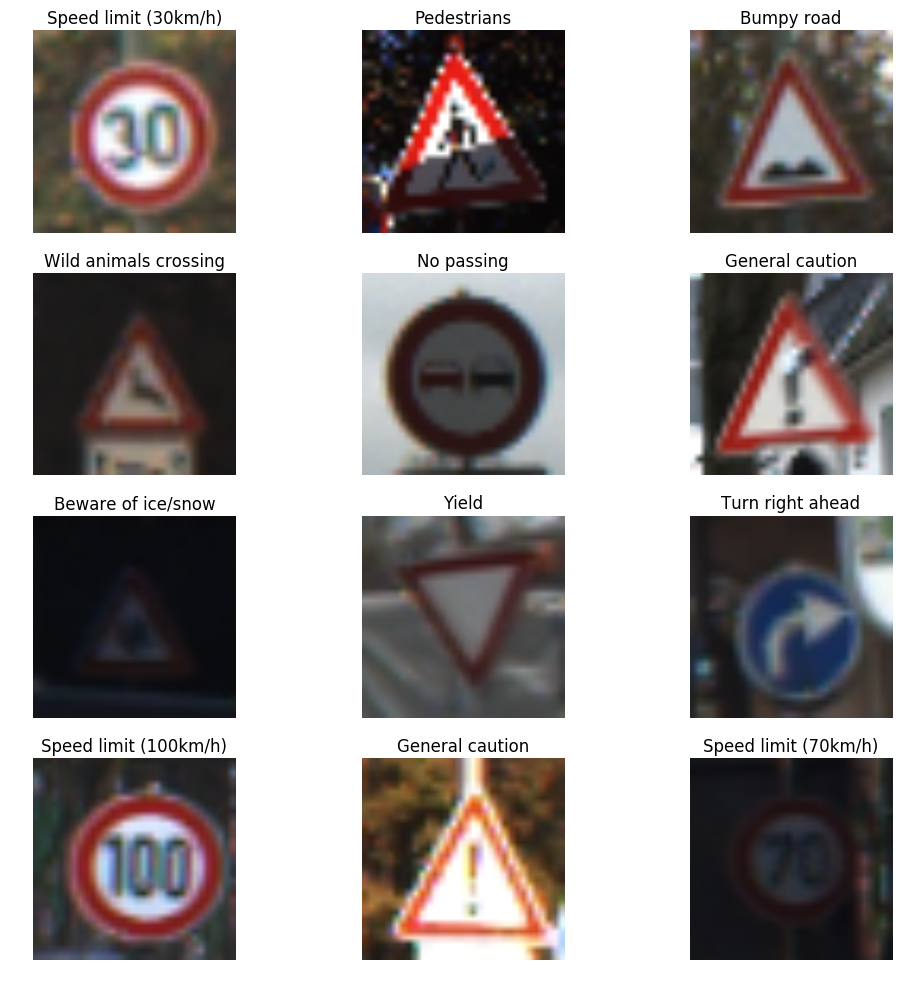

In [6]:
X_sample, y_sample = resample(X_test, y_test, n_samples=12)
gs1 = gridspec.GridSpec(4, 3)
gs1.update(wspace=0.005, hspace=0.01) # set the spacing between axes.
plt.figure(figsize=(12,12))
for i in range(12):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    plt.subplot(4,3,i+1)
    plt.imshow(X_sample[i])
    plt.title(SignNames[SignNames['ClassId'] == y_sample[i]]['SignName'].values[0])
    plt.axis('off')

Visualize predictions results and probability

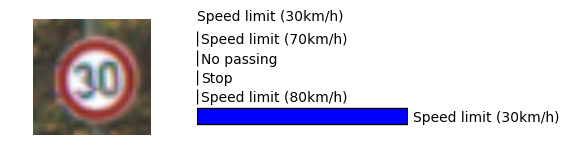

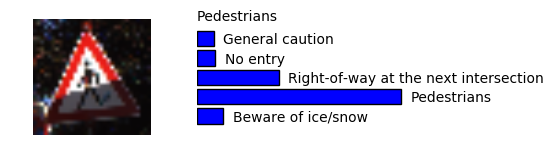

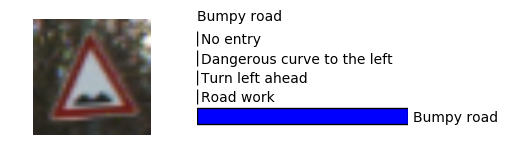

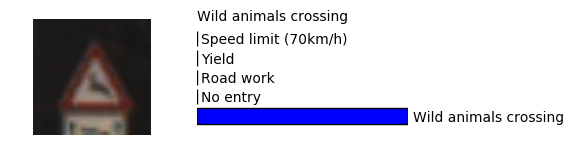

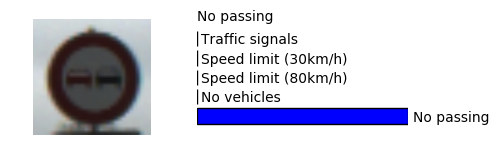

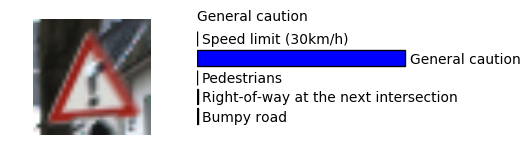

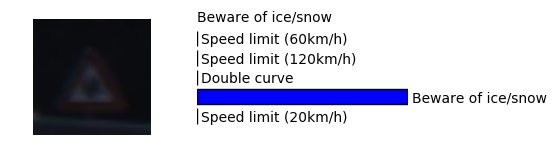

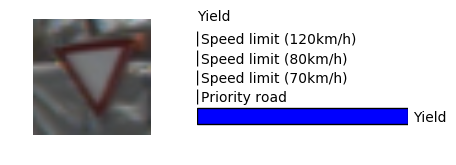

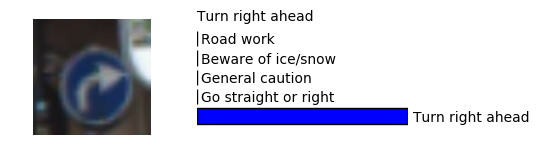

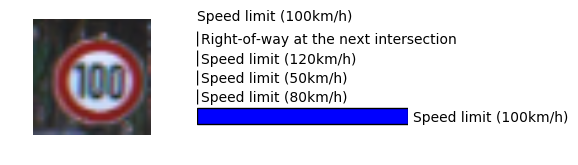

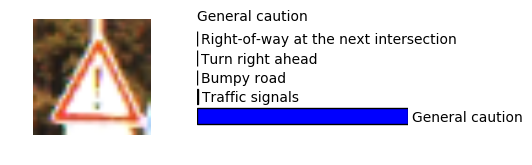

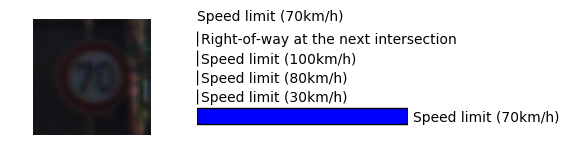

In [7]:
y_prob = model.predict(X_sample)
for i in range(12):
    plt.figure(figsize = (5,1.5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[2,3])
    plt.subplot(gs[0])
    plt.imshow(X_sample[i])
    plt.axis('off')
    plt.subplot(gs[1])
    top5_ind = np.argpartition(y_prob[i], -5)[-5:]
    plt.barh(6-np.arange(5),y_prob[i][top5_ind], align='center')
    for i_label in range(5):
        plt.text(y_prob[i][top5_ind][i_label]+.02,6-i_label-.25,
            SignNames[SignNames['ClassId'] == top5_ind[i_label]]['SignName'].values[0])
    plt.axis('off')
    plt.text(0,6.95,SignNames[SignNames['ClassId'] == y_sample[i]]['SignName'].values[0])
    plt.show()

Load and visualize sign images from internet

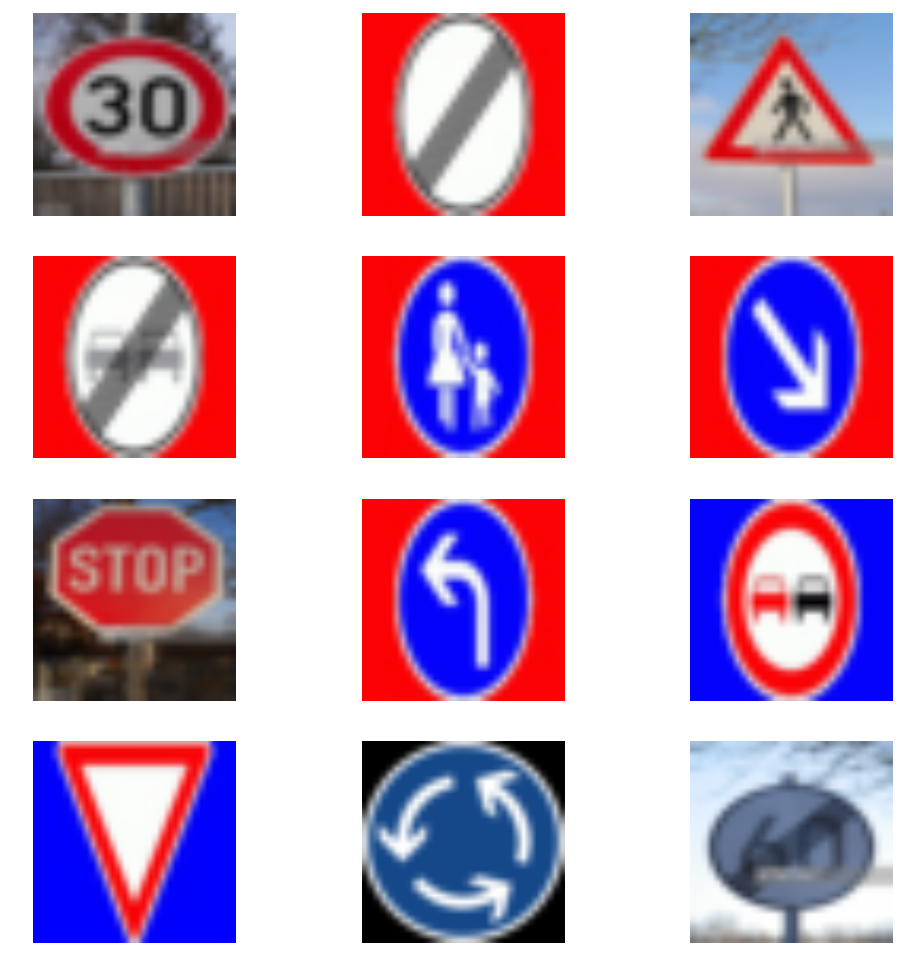

In [8]:
image_names = glob.glob('./new-signs/*.jpg')

X_sample_new = []
for image_name in image_names:
    img = imread(image_name)
    img = imresize(img, (32, 32))
    X_sample_new.append(img)

X_sample_new = np.array(X_sample_new)
## examine the results
gs1 = gridspec.GridSpec(4, 3)
gs1.update(wspace=0.005, hspace=0.01) # set the spacing between axes.
plt.figure(figsize=(12,12))
for i in range(12):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    plt.subplot(4,3,i+1)
    plt.imshow(X_sample_new[i])
    plt.axis('off')

Visualize prediction results

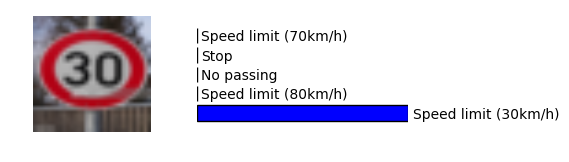

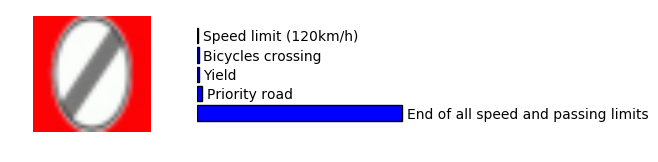

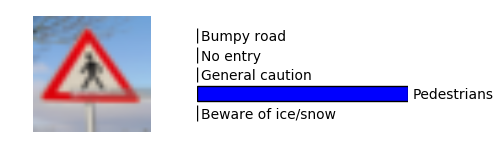

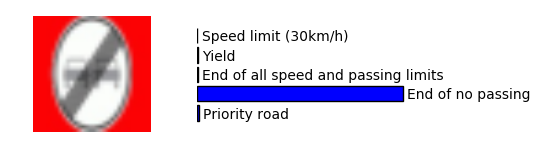

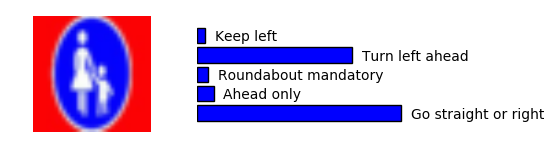

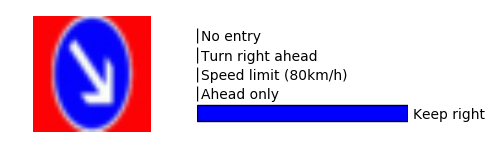

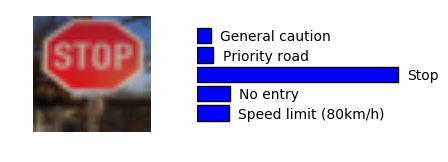

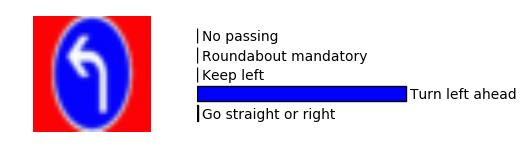

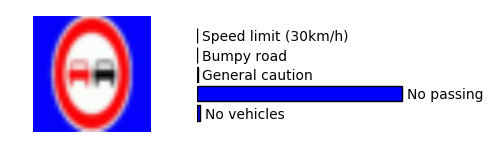

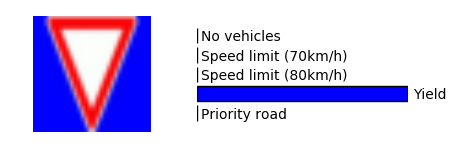

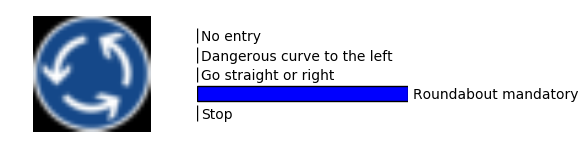

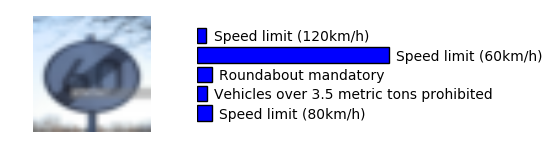

In [9]:
y_prob = model.predict(X_sample_new)
for i in range(12):
    plt.figure(figsize = (5,1.5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[2,3])
    plt.subplot(gs[0])
    plt.imshow(X_sample_new[i])
    plt.axis('off')
    plt.subplot(gs[1])
    top5_ind = np.argpartition(y_prob[i], -5)[-5:]
    plt.barh(6-np.arange(5),y_prob[i][top5_ind], align='center')
    for i_label in range(5):
        plt.text(y_prob[i][top5_ind][i_label]+.02,6-i_label-.25,
            SignNames[SignNames['ClassId'] == top5_ind[i_label]]['SignName'].values[0])
    plt.axis('off')
    plt.show()